In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

TensorShape([60000, 28, 28, 1])

In [6]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same', use_bias=False), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid', use_bias=False), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh', use_bias=False), #C5
    keras.layers.Dense(84, activation='tanh', use_bias=False), #F6
    keras.layers.Dense(10, activation='softmax', use_bias=False) #Output layer
])

In [7]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [8]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2309 - accuracy: 0.9324 - val_loss: 0.0830 - val_accuracy: 0.9776
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0873 - accuracy: 0.9735 - val_loss: 0.0609 - val_accuracy: 0.9840
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0612 - accuracy: 0.9810 - val_loss: 0.0407 - val_accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.0418 - val_accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0286 - val_accuracy: 0.9914


In [10]:
lenet_5_model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0515 - accuracy: 0.9844


[0.051536522805690765, 0.9843999743461609]

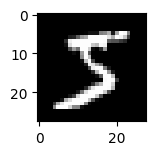

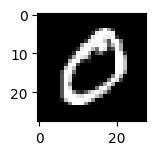

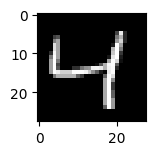

In [9]:
for i in range(3):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [11]:
lenet_5_model.save('lenet_5_model')
print(os.listdir('lenet_5_model'))

NameError: ignored

In [11]:
lenet_5_model.save("my.txt")

In [37]:
lenet_5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         150       
                                                                 
 average_pooling2d_2 (Avera  (None, 14, 14, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2400      
                                                                 
 average_pooling2d_3 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [38]:
json_model = lenet_5_model.to_json()

In [39]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [12]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

In [18]:
array = lenet_5_model.layers[0].get_weights()
lenet_5_model.layers[0].get_weights()

[array([[[[ 0.04921122,  0.01317491, -0.30984765,  0.13334852,
           -0.34144077,  0.11365784]],
 
         [[ 0.02822328, -0.15514615, -0.24909978,  0.50686073,
           -0.46079078,  0.14457363]],
 
         [[ 0.01343575, -0.0044383 , -0.14493392,  0.29769644,
           -0.35630903,  0.5261318 ]],
 
         [[ 0.30050313, -0.24241044, -0.11289859, -0.00322628,
           -0.02803247,  0.38961777]],
 
         [[ 0.15295008, -0.19462152, -0.1341976 , -0.3040234 ,
           -0.05268985,  0.3777131 ]]],
 
 
        [[[ 0.23134688, -0.0306934 , -0.2984502 ,  0.05415579,
           -0.49320364,  0.10566639]],
 
         [[-0.16216643, -0.0541052 , -0.02564456,  0.8394994 ,
           -0.5345097 ,  0.3887105 ]],
 
         [[-0.16491859, -0.23347847, -0.2323649 ,  0.13467363,
           -0.2923712 ,  0.23950519]],
 
         [[ 0.0341038 , -0.26642987, -0.13282005, -0.2048661 ,
            0.18615583,  0.4511818 ]],
 
         [[ 0.14637056, -0.27307466, -0.2844775 , -0.12163406

In [39]:
array[0].shape
array[0].reshape((25,6)).transpose()


array([[ 0.04921122,  0.02822328,  0.01343575,  0.30050313,  0.15295008,
         0.23134688, -0.16216643, -0.16491859,  0.0341038 ,  0.14637056,
         0.02431371, -0.27005976, -0.2656251 , -0.19794257, -0.2959795 ,
         0.15959498, -0.17195563, -0.12278334, -0.40298063, -0.11403089,
         0.0565856 ,  0.32181007,  0.04196667,  0.12708096,  0.16891913],
       [ 0.01317491, -0.15514615, -0.0044383 , -0.24241044, -0.19462152,
        -0.0306934 , -0.0541052 , -0.23347847, -0.26642987, -0.27307466,
        -0.09219603,  0.05626501, -0.09245501, -0.02088248, -0.02870112,
         0.31274936,  0.27475825,  0.43394375,  0.6366311 ,  0.45138338,
         0.35834876,  0.5614213 ,  0.546181  ,  0.41537574,  0.4264787 ],
       [-0.30984765, -0.24909978, -0.14493392, -0.11289859, -0.1341976 ,
        -0.2984502 , -0.02564456, -0.2323649 , -0.13282005, -0.2844775 ,
        -0.27489787,  0.06639867,  0.14308539, -0.18778755, -0.14075612,
         0.35201204,  0.41804   ,  0.40780982,  0

array([-0.1380514 ,  0.05189569,  0.02828893, ..., -0.01252477,
        0.00065355,  0.11137357], dtype=float32)

In [41]:
weights = array[0].reshape((25,6)).transpose()
weights_shape = weights.shape

print(weights_shape)

with open('layer_weights_0.bin', 'wb') as file:
    for weight_matrix in weights:
        # Flatten the weight matrix and write it to the file
        weight_matrix.flatten().tofile(file)

(6, 25)


In [69]:
layer0 = lenet_5_model.layers[7]

weights = layer0.get_weights()
weights_shape = weights[0].shape

print(weights_shape)

with open('layer_weights_7.bin', 'wb') as file:
    for weight_matrix in weights:
        # Flatten the weight matrix and write it to the file
        weight_matrix.flatten().tofile(file)



(84, 10)


In [47]:
array2 = lenet_5_model.layers[2].get_weights()
lenet_5_model.layers[2].get_weights()

[array([[[[-1.38051406e-01,  5.18956929e-02,  2.82889344e-02, ...,
           -3.47239450e-02,  1.67418852e-01, -1.67560130e-01],
          [ 1.57646447e-01, -9.15947035e-02,  1.04600348e-01, ...,
           -6.82865009e-02, -1.14421643e-01,  7.09265620e-02],
          [ 2.45743260e-01, -2.23316923e-01, -5.10070883e-02, ...,
            6.60229027e-02,  2.13264022e-02,  1.78022012e-02],
          [-5.22904098e-02, -6.43969923e-02,  2.89506838e-02, ...,
           -6.75516017e-03,  4.40270565e-02,  6.35941103e-02],
          [ 6.96640015e-02, -7.82053545e-03,  3.32681537e-02, ...,
           -1.13654017e-01, -6.33801594e-02,  1.51407838e-01],
          [-5.73156662e-02,  9.33991186e-03,  1.81851424e-02, ...,
            2.57532112e-02, -2.45124623e-02, -1.60354391e-01]],
 
         [[ 1.63779795e-01,  4.66571888e-04, -8.70570540e-02, ...,
            7.54531175e-02,  1.95587426e-01, -2.03186184e-01],
          [ 9.32956487e-02, -9.63646993e-02, -2.85527129e-02, ...,
            7.861472

In [64]:
a.reshape(16,25*6)

array([[-0.1380514 ,  0.1637798 ,  0.10134409, ...,  0.14571728,
         0.07338631, -0.02098874],
       [ 0.05189569,  0.00046657, -0.01187375, ..., -0.05385061,
        -0.15760083, -0.03222146],
       [ 0.02828893, -0.08705705, -0.07872476, ...,  0.07592332,
         0.00071172, -0.07143575],
       ...,
       [-0.03472394,  0.07545312, -0.13233075, ...,  0.04655015,
         0.0223188 , -0.01252477],
       [ 0.16741885,  0.19558743, -0.2851674 , ..., -0.00073013,
        -0.08475074,  0.00065355],
       [-0.16756013, -0.20318618,  0.0550495 , ...,  0.1197837 ,
        -0.00426716,  0.11137357]], dtype=float32)

In [66]:
array2[0].shape
a = array2[0].reshape(25,6,16).transpose()
a = a.reshape(16,25*6)

weights = a
weights_shape = weights.shape

print(weights_shape)

with open('layer_weights_2.bin', 'wb') as file:
    for weight_matrix in weights:
        # Flatten the weight matrix and write it to the file
        weight_matrix.flatten().tofile(file)


(16, 150)


In [15]:
import tensorflow as tf
import numpy as np

# Input matrix (7x7)
h_input = [
    [0, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0]
]

# Filter (3x3)
h_filter = [
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
]

# Reshape to fit TensorFlow's conv2d requirements: [batch, height, width, channels]
input_tensor = np.array(h_input, dtype=np.float32).reshape(1, 7, 7, 1)
filter_tensor = np.array(h_filter, dtype=np.float32).reshape(3, 3, 1, 1)

# Perform the convolution operation
output_tensor = tf.nn.conv2d(input_tensor, filter_tensor, strides=[1, 1, 1, 1], padding='SAME')

# Print the output
print(output_tensor.numpy().squeeze())


[[0. 2. 2. 3. 1. 1. 0.]
 [1. 1. 4. 3. 4. 1. 1.]
 [0. 1. 2. 4. 3. 3. 0.]
 [0. 1. 2. 3. 4. 1. 1.]
 [1. 1. 3. 3. 1. 1. 0.]
 [1. 3. 3. 1. 1. 0. 0.]
 [2. 2. 1. 1. 0. 0. 0.]]
